In [148]:
# Import libraries
import math
import pandas_datareader as web
import  numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [149]:
# description: this program uses an artificial neural network called lon short Term Memory (LSTM)
#           to prsedict the closing stock price of corporation(Apple Inc.) using the past 60 day stock price.

In [11]:
pip install tensorflow

     |████████████████████████████████| 394.4 MB 1.8 kB/s eta 0:00:01    |███████▋                        | 94.2 MB 1.9 MB/s eta 0:02:41     |████████                        | 97.9 MB 3.5 MB/s eta 0:01:24     |█████████▌                      | 116.6 MB 727 kB/s eta 0:06:22     |█████████▊                      | 119.5 MB 411 kB/s eta 0:11:08     |█████████████████▍              | 214.1 MB 1.1 MB/s eta 0:02:38
     |████████████████████████████████| 462 kB 338 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 143 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 455 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 518 kB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 743 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 317 kB/s eta 0:00:01
     |████████████████████████████████| 129 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 213 kB/s eta 0:00:01    |█████████████████████████████▌  | 9.8 MB 1

In [152]:
#Get the stock quote
df  = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-04-21')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-04-08,130.389999,128.520004,128.949997,130.360001,88844600.0,130.360001
2021-04-09,133.039993,129.470001,129.800003,133.000000,106513800.0,133.000000
2021-04-12,132.850006,130.630005,132.520004,131.240005,91420000.0,131.240005


In [153]:
#Get the number of row and columns in data set
df.shape

(2335, 6)

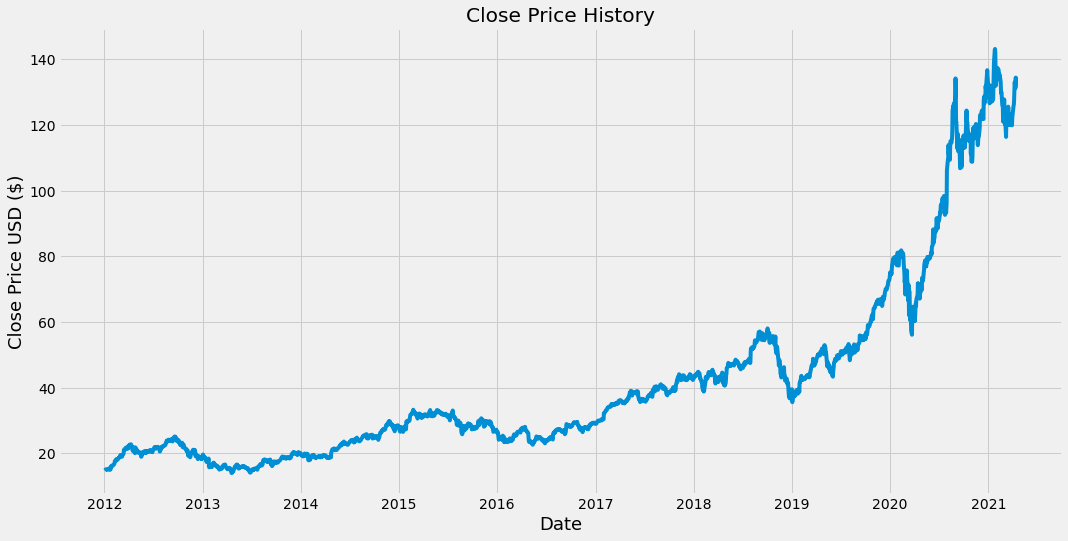

In [154]:
#visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [155]:
#Creating a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len


1868

In [156]:
#Scale the data before entered in neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
    
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.90774888],
       [0.93243679],
       [0.91386279]])

In [132]:
#Create the training data set
#Create the scaled the training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00447025, 0.00302785, 0.00329904,
       0.00353746, 0.00518251, 0.00579344, 0.00483383, 0.00551629,
       0.001052  , 0.00172552, 0.00350169, 0.0021487 , 0.00246162,
       0.00284606, 0.00269705, 0.00286394, 0.00466694, 0.00458052,
       0.00254506, 0.00119207, 0.00195797, 0.00188644, 0.00138578,
       0.00088213, 0.00095366, 0.00077484, 0.00234539, 0.00112054,
       0.00122485, 0.00100432, 0.00129041, 0.00153777, 0.00233645,
       0.00348977, 0.00250036, 0.0022232 , 0.00258082, 0.00188644,
       0.00253314, 0.00271791, 0.00285798, 0.00488747, 0.00470866,
       0.00490833, 0.00569509, 0.00802856, 0.00879447, 0.00751896])]
[0.00854711290330825]

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00

In [157]:
#Convert the x_train and y_train to numpy arrays to train the LSTM model
x_train , y_train = np.array(x_train), np.array(y_train)


In [158]:
#Reshape the x data set to 3D (expected)
x_train  = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1808, 60, 1)

In [159]:
#Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [160]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [161]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1808/1808 [==============================] - 43s 23ms/step - loss: 0.0019


In [162]:
#Create the testing data set
#Create a new array containing scaled values from index 1802 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_tests and y_tests
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [163]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [164]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [165]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [166]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

1.1021087450439977

<ipython-input-167-b5d1a35ab357>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


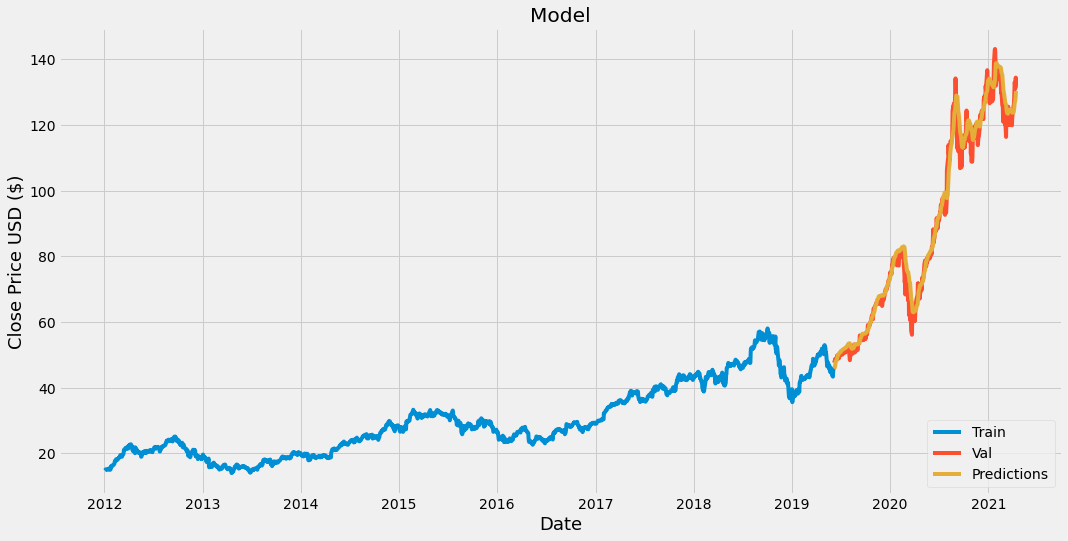

In [167]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the model/data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [168]:
#Show the valid and the predicted prices
valid

,Close,Predictions
Date,,
2019-06-07,47.537498,45.765842
2019-06-10,48.145000,46.070198
2019-06-11,48.702499,46.507858
2019-06-12,48.547501,47.035805
2019-06-13,48.537498,47.563324
...,...,...
2021-04-08,130.360001,125.613815
2021-04-09,133.000000,126.623573
2021-04-12,131.240005,127.893211


In [179]:
#Get the quote (predict via date)
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-04-21')
#Create a dataframe 
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape [1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[131.32137]]


In [177]:
#Get the quote (actual compare)
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2012-04-08', end='2021-04-14')
print(apple_quote2['Close'])

Date
2012-04-09     22.722500
2012-04-10     22.444286
2012-04-11     22.364286
2012-04-12     22.241785
2012-04-13     21.615356
                 ...    
2021-04-08    130.360001
2021-04-09    133.000000
2021-04-12    131.240005
2021-04-13    134.429993
2021-04-14    132.029999
Name: Close, Length: 2269, dtype: float64
